In [44]:
DF_PATH = '../data/processed/1_preprocessed_df.pkl'
ROLES_PATH = '../data/raw/roles_short_names.csv'
EXPORT_PATH = 'C:/Users/pc/Jop_recommendation_Project/Jop_recommendation/data/processed/2_preprocessed_df.pkl'
FIG_DIR = "../reports/figures"


JOPS_COLS      = ['DevType']
SKILLS_COLS      = ['LanguageWorkedWith',
                  'DatabaseWorkedWith',
                  'PlatformWorkedWith',
                  'WebframeWorkedWith',
                  'MiscTechWorkedWith',
                  'NEWCollabToolsWorkedWith']

In [45]:
# Load packages
import pandas as pd 
import numpy as np
import logging
import pickle
import os

import plotly 
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.figure_factory as ff

from sklearn.manifold import TSNE
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.cluster import AgglomerativeClustering

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

### Read data and preprocess


In [46]:
raw_df = pd.read_pickle(DF_PATH)
roles_names = pd.read_csv(ROLES_PATH, sep=';')

In [47]:
raw_df.columns


Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [48]:
# display unique values in jops and skils columns
for col in JOPS_COLS + SKILLS_COLS:
    print(col)
    print('---------------------')
    print(raw_df[col])

DevType
---------------------
0        [Developer, desktop or enterprise applications...
1               [Developer, full-stack, Developer, mobile]
2                                                       []
3                                                       []
4                                                       []
                               ...                        
64456                                [Senior executive/VP]
64457                                                   []
64458                                                   []
64459                                                   []
64460                                                   []
Name: DevType, Length: 64461, dtype: object
LanguageWorkedWith
---------------------
0                               [C#, HTML/CSS, JavaScript]
1                                      [JavaScript, Swift]
2                             [Objective-C, Python, Swift]
3                                                       []


### Onehot enconde

In [49]:
df = raw_df.copy()
encoded_dfs = {}
for col in JOPS_COLS + SKILLS_COLS:
    binarizer = MultiLabelBinarizer()
    encoded_df = pd.DataFrame(binarizer.fit_transform(df[col]),
                               columns=binarizer.classes_,
                               index=df[col].index)
    encoded_dfs[col] = encoded_df

In [50]:
# Merge 1-hot encoded 
df = pd.concat(encoded_dfs, axis=1)
df

DevType                           \
      Academic researcher Data or business analyst   
0                       0                        0   
1                       0                        0   
2                       0                        0   
3                       0                        0   
4                       0                        0   
...                   ...                      ...   
64456                   0                        0   
64457                   0                        0   
64458                   0                        0   
64459                   0                        0   
64460                   0                        0   

                                                                            \
      Data scientist or machine learning specialist Database administrator   
0                                                 0                      0   
1                                                 0                      0   
2                                                 0                      0   
3                                                 0                      0   
4                                                 0                      0   
...                                             ...                    ...   
64456                                             0                      0   
64457                                             0                      0   
64458                                             0                      0   
64459                                             0                      0   
64460                                             0                      0   

                                                                            \
      Designer DevOps specialist Developer, QA or test Developer, back-end   
0            0                 0                     0                   0   
1            0                 0                     0                   0   
2            0                 0                     0                   0   
3            0                 0                     0                   0   
4            0                 0                     0                   0   
...        ...               ...                   ...                 ...   
64456        0                 0                     0                   0   
64457        0                 0                     0                   0   
64458        0                 0                     0                   0   
64459        0                 0                     0                   0   
64460        0                 0                     0                   0   

                                                     \
      Developer, desktop or enterprise applications   
0                                                 1   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   
...                                             ...   
64456                                             0   
64457                                             0   
64458                                             0   
64459                                             0   
64460                                             0   

                                                   ...  \
      Developer, embedded applications or devices  ...   
0                                               0  ...   
1                                               0  ...   
2                                               0  ...   
3                                               0  ...   
4                                               0  ...   
...                                           ...  ...   
64456                                           0  ...   
64457                                          

### Display jobs frequency


In [51]:
jobs_freq = df['DevType'].copy().sum().sort_values().rename_axis('unique_jops').reset_index(name='count')

In [52]:
jobs_freq

,unique_jops,count
0,Marketing or sales professional,642
1,Senior executive/VP,1320
2,"Engineer, site reliability",1940
3,Scientist,2086
4,Product manager,2497
5,Engineering manager,2724
6,"Developer, game or graphics",2789
7,Educator,2928
8,Academic researcher,3552
9,"Engineer, data",3738


### Display skills frequency

In [53]:
# Calculate the sum for all cols except Devtypes
skills_freq = df.copy().drop('DevType', axis=1).sum().reset_index()
skills_freq.columns = ['group', 'skill', 'freq']

In [54]:
skills_freq

,group,skill,freq
0,LanguageWorkedWith,Assembly,3553
1,LanguageWorkedWith,Bash/Shell/PowerShell,18980
2,LanguageWorkedWith,C,12487
3,LanguageWorkedWith,C#,18041
4,LanguageWorkedWith,C++,13707
...,...,...,...
96,NEWCollabToolsWorkedWith,Microsoft Azure,7849
97,NEWCollabToolsWorkedWith,Microsoft Teams,13518
98,NEWCollabToolsWorkedWith,Slack,28018
99,NEWCollabToolsWorkedWith,Stack Overflow for Teams,3057


In [55]:
skills_freq.sort_values('freq', ascending=False)

,group,skill,freq
92,NEWCollabToolsWorkedWith,Github,43786
10,LanguageWorkedWith,JavaScript,38822
7,LanguageWorkedWith,HTML/CSS,36181
20,LanguageWorkedWith,SQL,31413
47,PlatformWorkedWith,Linux,29600
...,...,...,...
82,MiscTechWorkedWith,Puppet,945
26,DatabaseWorkedWith,Couchbase,937
45,PlatformWorkedWith,IBM Cloud or Watson,876
75,MiscTechWorkedWith,Chef,733


### visualize  skills frequency

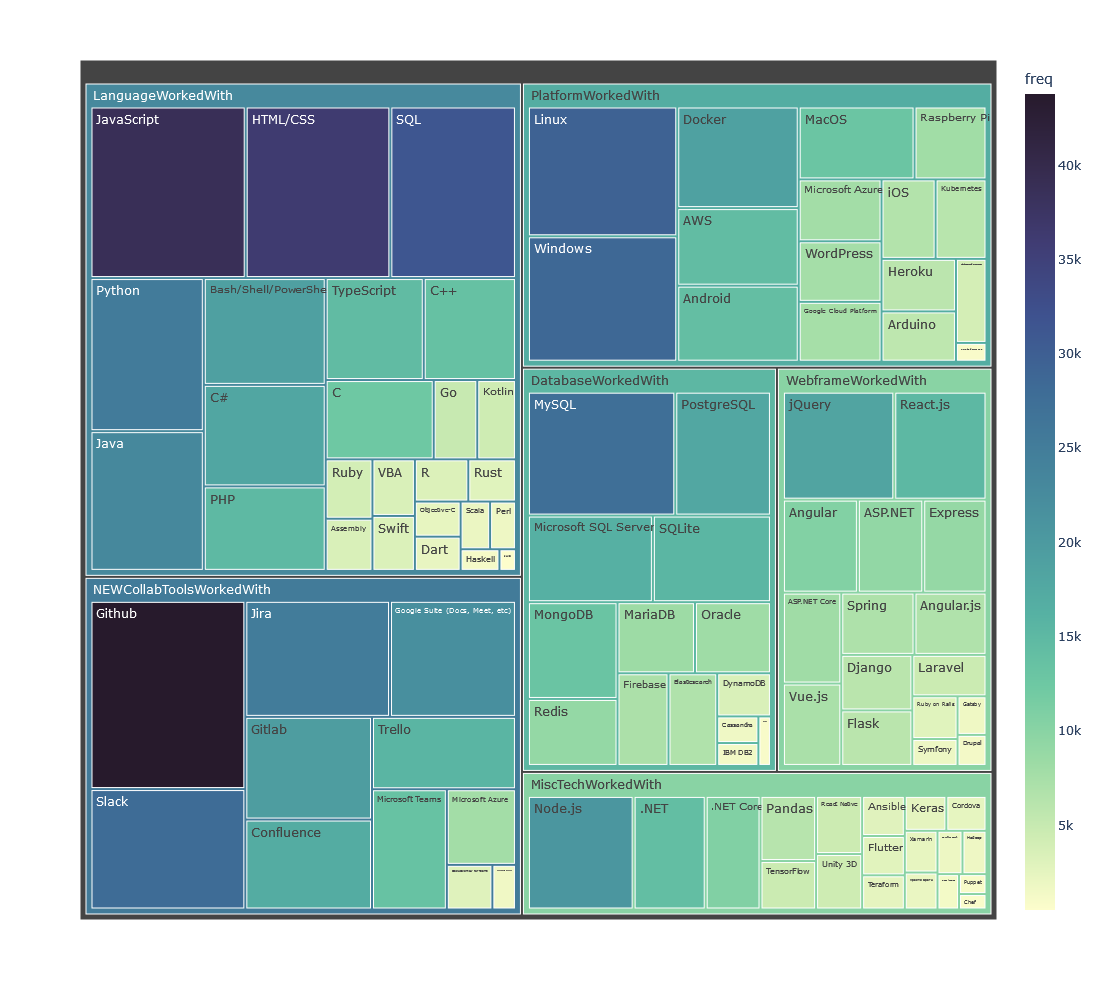

In [56]:
fig = px.treemap(skills_freq, 
                 path=['group', 'skill'], 
                 color_continuous_scale='deep',
                 values='freq',color='freq')

fig.update_layout(width=1150, height=1000)
fig.show()

fig.write_html(os.path.join(FIG_DIR, 'treemap_skills_freq.html'))

## exploring relationship between Jops and Skills
### Create Jobs & Skills Heatmap

In [57]:
sorted_roles = df['DevType'].sum().sort_values().index.tolist()

In [58]:
sorted_skills = df.drop('DevType', axis=1).sum().sort_values(ascending=False).droplevel(level=0).index.tolist()

In [59]:
skills = []

# For each jop, calculate the percentage of each skill
for role in sorted_roles: 
    # Filter for the role
    role_mask = (df[('DevType', role)] == 1)

    #For each skill column, calculate mean of the one-hot-encoded -> percentage
    skills_role = pd.concat({tech_col: df.loc[role_mask, tech_col].mean() * 100
                             for tech_col in SKILLS_COLS})

    # Append to original list
    skills.append(skills_role)

# Concat and format
skills = pd.concat(skills, axis=1)
skills.columns = sorted_roles
skills = skills.reset_index(level=0, drop=True)
skills = skills.loc[sorted_skills]
skills = skills.T

In [60]:
skills

,Github,JavaScript,HTML/CSS,SQL,Linux,Windows,Slack,MySQL,Python,Jira,...,Facebook Workplace,IBM DB2,Drupal,Unreal Engine,Haskell,Puppet,Couchbase,IBM Cloud or Watson,Chef,Julia
Marketing or sales professional,70.872274,71.028037,76.635514,57.788162,42.367601,47.196262,45.638629,61.370717,38.629283,28.971963,...,11.370717,5.763240,9.968847,6.853583,4.205607,4.517134,6.230530,7.476636,4.672897,4.049844
Senior executive/VP,75.075758,72.878788,69.166667,65.075758,58.863636,44.318182,59.393939,49.545455,45.984848,43.939394,...,5.681818,5.227273,6.060606,4.318182,3.409091,4.848485,5.227273,5.000000,3.939394,2.727273
"Engineer, site reliability",79.845361,65.876289,58.505155,61.701031,74.639175,39.432990,60.567010,53.762887,59.896907,56.340206,...,5.721649,3.711340,5.206186,3.144330,3.969072,9.278351,3.659794,3.298969,8.041237,2.010309
Scientist,77.756472,48.465964,47.027804,43.672100,67.162033,50.000000,45.493768,39.213806,67.689358,32.118888,...,3.739214,3.499521,3.691275,4.026846,4.554171,2.301055,3.259827,3.978907,2.157239,5.465005
Product manager,75.090108,73.007609,69.603524,63.115739,53.664397,50.620745,53.344013,52.422907,42.010412,44.533440,...,4.565479,3.924710,5.246296,3.203845,2.282739,3.003604,3.123748,2.803364,2.643172,1.561874
Engineering manager,75.991189,69.346549,60.682819,60.425844,61.600587,42.621145,61.453744,47.099853,46.512482,59.030837,...,4.038179,3.817915,4.662261,2.679883,2.679883,4.515419,4.001468,2.790015,4.331865,1.578561
"Developer, game or graphics",79.455002,67.228397,62.459663,49.264970,52.922194,64.252420,49.408390,48.045895,43.850843,42.344926,...,3.908211,2.617426,3.657225,16.098960,3.155253,2.402295,3.011832,2.294729,2.007888,1.398351
Educator,78.278689,68.408470,66.803279,56.625683,56.933060,51.263661,51.434426,53.859290,45.252732,40.471311,...,4.337432,3.790984,4.678962,3.381148,4.200820,2.834699,2.766393,2.698087,2.288251,2.185792
Academic researcher,77.730856,54.194820,53.462838,46.706081,62.190315,49.099099,45.213964,47.015766,59.037162,30.152027,...,3.997748,3.040541,3.293919,2.956081,4.504505,2.111486,2.505631,3.350225,1.520270,4.335586
"Engineer, data",75.307651,56.902087,52.594971,67.174960,62.841091,49.518459,52.220439,49.678973,65.088283,49.277689,...,4.119850,4.333868,3.210273,2.701980,2.835741,2.808989,3.504548,3.263777,2.354200,2.247191


### Normalizing features


In [61]:
std_skills = StandardScaler().fit_transform(skills)
std_skills = pd.DataFrame(std_skills, columns=skills.columns, index=skills.index)

In [62]:
std_skills

,Github,JavaScript,HTML/CSS,SQL,Linux,Windows,Slack,MySQL,Python,Jira,...,Facebook Workplace,IBM DB2,Drupal,Unreal Engine,Haskell,Puppet,Couchbase,IBM Cloud or Watson,Chef,Julia
Marketing or sales professional,-1.379396,0.433816,1.510025,-0.260708,-1.567770,-0.581246,-0.728538,2.216239,-0.766784,-1.807358,...,4.148711,2.315078,3.687879,1.109495,1.468417,0.763845,3.170701,3.459064,1.239791,1.589551
Senior executive/VP,-0.006989,0.636243,0.649598,0.622312,0.215087,-0.995570,1.537556,-0.185986,-0.140330,0.006039,...,0.901025,1.714835,1.193263,0.218279,0.627067,0.952938,2.187051,1.605396,0.785153,0.621855
"Engineer, site reliability",1.550252,-0.129660,-0.578629,0.213405,1.920074,-1.698835,1.730811,0.670758,1.044524,1.508474,...,0.923764,0.017105,0.647890,-0.194340,1.218568,3.480932,0.650205,0.332239,3.327545,0.097269
Scientist,0.868245,-2.033926,-1.900843,-1.971116,1.111960,-0.177623,-0.752402,-2.284794,1.708186,-1.426089,...,-0.207972,-0.220117,-0.319072,0.115872,1.836601,-0.500806,0.258055,0.841147,-0.319457,2.624992
Product manager,-0.002303,0.650333,0.699925,0.384822,-0.346836,-0.088262,0.540872,0.398550,-0.478822,0.078011,...,0.263728,0.256063,0.673492,-0.173420,-0.562685,-0.099882,0.124635,-0.038702,-0.018268,-0.230841
Engineering manager,0.291893,0.249902,-0.327758,0.058894,0.510891,-1.239873,1.876895,-0.682794,-0.095392,1.834461,...,-0.037298,0.136461,0.300705,-0.357597,-0.143187,0.762866,0.985202,-0.048694,1.028413,-0.218632
"Developer, game or graphics",1.422803,0.018228,-0.123062,-1.293442,-0.427052,1.874134,-0.107495,-0.490612,-0.322077,-0.187141,...,-0.111494,-1.207997,-0.340806,4.359325,0.358940,-0.443031,0.014906,-0.419396,-0.412027,-0.350488
Educator,1.038745,0.147299,0.377331,-0.401562,0.006434,0.004291,0.226280,0.690342,-0.202682,-0.414141,...,0.133540,0.106300,0.311365,-0.111096,1.463360,-0.196271,-0.225736,-0.117498,-0.238253,0.225666
Academic researcher,0.859882,-1.407328,-1.159514,-1.603496,0.574627,-0.307316,-0.798498,-0.699876,0.971301,-1.664386,...,-0.060379,-0.734140,-0.572703,-0.260511,1.784139,-0.608987,-0.481403,0.370602,-0.714261,1.798622
"Engineer, data",0.068723,-1.111219,-1.259494,0.876667,0.644962,-0.246945,0.355771,-0.158863,1.486659,0.652807,...,0.009327,0.714290,-0.626094,-0.349830,0.021444,-0.210943,0.497993,0.305899,-0.197377,0.270590


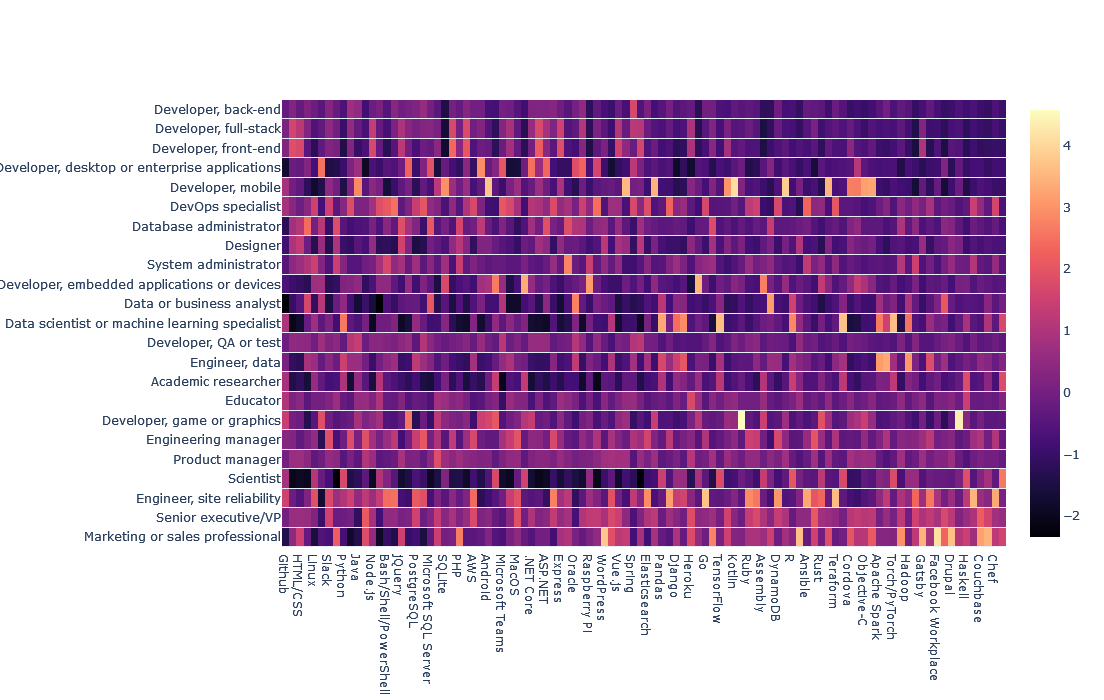

In [63]:
fig = go.Figure(data=go.Heatmap(z=std_skills, x=skills.columns,y=skills.index, colorscale='magma', ygap=1))
fig.update_layout(width=1200, height=700)
fig.show()
fig.write_html(os.path.join(FIG_DIR, 'heatmap.html'))

### Create Jobs dendrogram


In [64]:
roles_short_dict = roles_names.set_index('Original name')["Short name "].to_dict()
short_labels = [roles_short_dict[role] 
                for role in sorted_roles]

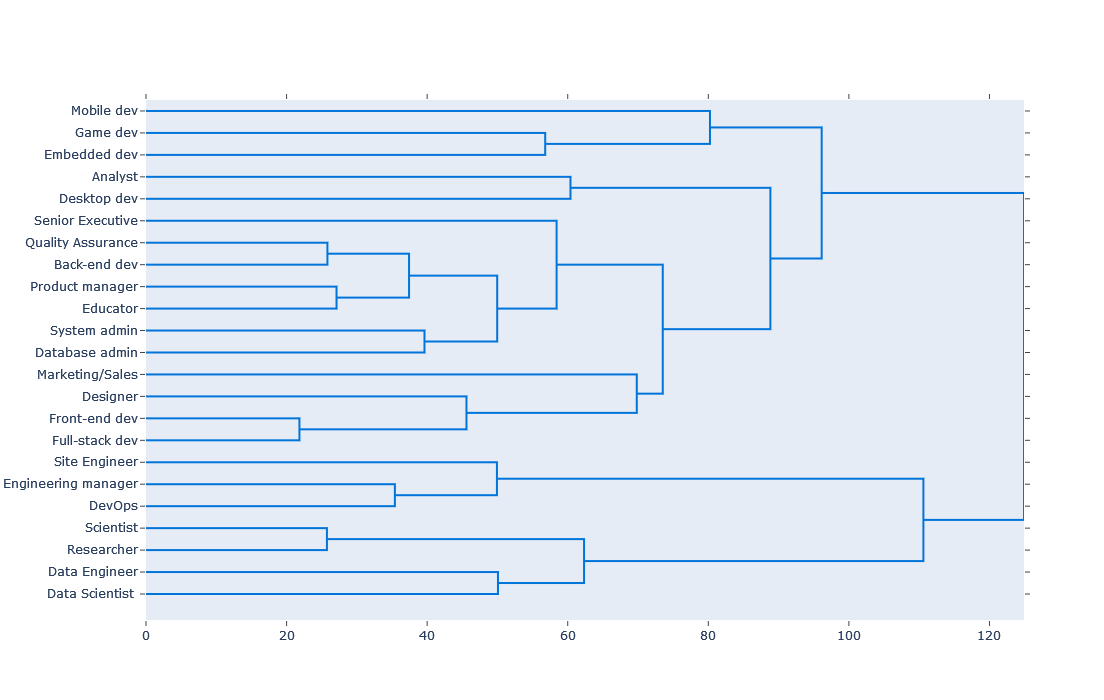

In [65]:
fig = ff.create_dendrogram(skills, labels=short_labels, orientation='left', color_threshold=0)
fig.update_layout(height=700, width=1000, showlegend=False)
fig.show()

### Job profiles


In [66]:
sorted_roles

['Marketing or sales professional',
 'Senior executive/VP',
 'Engineer, site reliability',
 'Scientist',
 'Product manager',
 'Engineering manager',
 'Developer, game or graphics',
 'Educator',
 'Academic researcher',
 'Engineer, data',
 'Developer, QA or test',
 'Data scientist or machine learning specialist',
 'Data or business analyst',
 'Developer, embedded applications or devices',
 'System administrator',
 'Designer',
 'Database administrator',
 'DevOps specialist',
 'Developer, mobile',
 'Developer, desktop or enterprise applications',
 'Developer, front-end',
 'Developer, full-stack',
 'Developer, back-end']

In [67]:
role = 'Data scientist or machine learning specialist'

In [68]:
single_role_skills = pd.concat([skills.loc[role], std_skills.loc[role]], axis=1)
single_role_skills.columns = ['percentage', 'specificity']
single_role_skills = single_role_skills.sort_values('percentage')

In [69]:
single_role_skills

,percentage,specificity
Chef,2.081244,-0.366560
Couchbase,2.357071,-0.627059
Puppet,2.432297,-0.425910
Gatsby,2.683049,-0.732300
Unreal Engine,2.758275,-0.330042
...,...,...
Slack,51.078235,0.167600
SQL,58.450351,-0.180472
Linux,63.540622,0.720565
Github,78.059178,0.967076


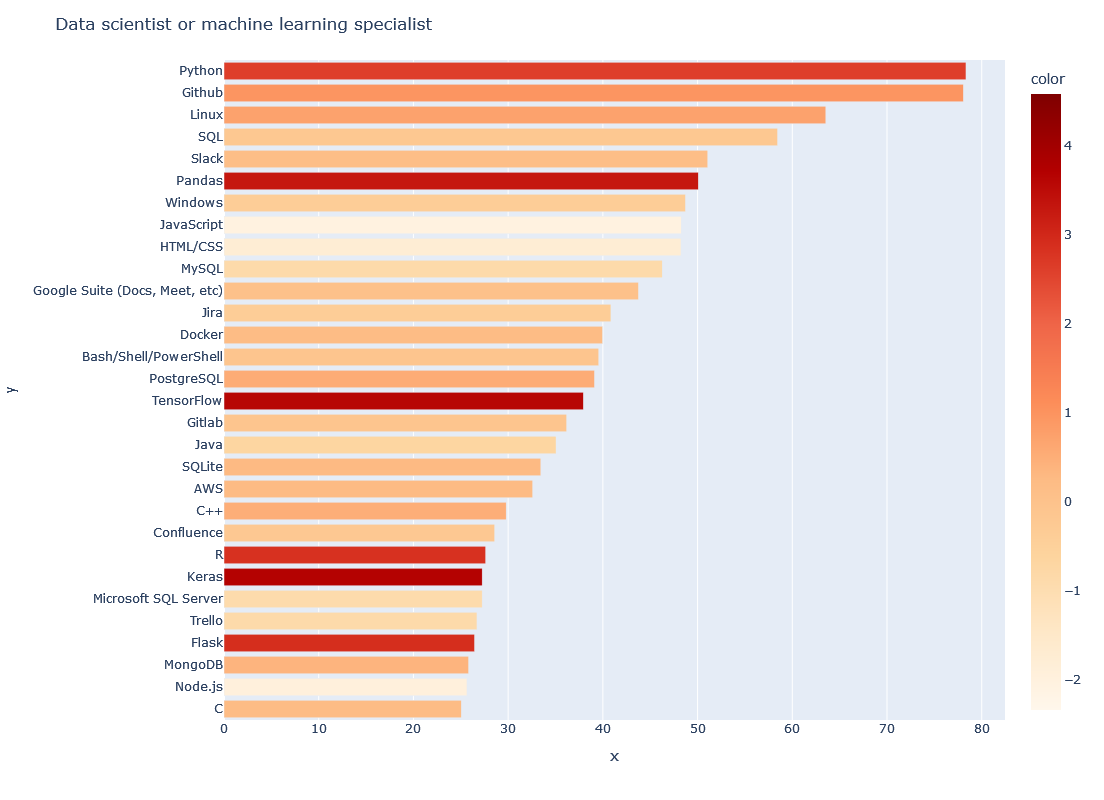

In [70]:
threshold = 25

single_role_skills = single_role_skills[single_role_skills['percentage'] > threshold]

fig = px.bar(df, 
             y=single_role_skills.index, 
             x=single_role_skills['percentage'], 
             color=single_role_skills['specificity'], 
             color_continuous_scale='orrd', 
             range_color=[std_skills.values.min(),std_skills.values.max()],
             orientation='h')

fig.update_layout(width=800, height=800, title=role)
fig.show()

In [71]:
df.to_pickle(EXPORT_PATH)